# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [11]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [12]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**  
- 在模拟程序中，智能出租车停在十字路口没有移动；
- 驾驶代理程序在红灯时获得正的奖励（红灯停或者奖励）；
- 驾驶代理程序在绿灯，但在有对向车靠近时，获得正的奖励，但是奖励较少；
- 驾驶代理程序在绿灯而且交通路口顺畅时获得负分奖励（可以认为是一种惩罚）；
- 驾驶代理的奖励规则总体而言，与我们的日常的行为规范符合，即红灯停，绿灯走（交通不顺畅时让行），这样的行为会获得奖励。而绿灯且路况良好的情况下，仍然不开动出租车，会遭遇惩罚。这种奖惩制度运用于智能出租车有助于训练汽车按照正确的规范行驶；
- 但仍然需要留意的是，绿灯时，如果前面有车也需要保持车距，也就是车距达到一定距离以内时，可能需要负分奖励（惩罚机制）。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**  
- agent.py里的flag，选取`Environment()`构造方法的三个参数：1、verbose为True时，在模拟程序控制台打印出更多模拟过程状态信息；2、num_dummies代表在模拟环境中车辆的数量; 3、grid_size表示模拟环境中有多少个车道数量（街区），默认grid_size(8,6)为8条南北通向的车道，6条东西方向的车道
- 在`environment.py` Python文件里，当代理程序执行一个行动时，调用Environment类的`'act()'`函数
- 在`simulator.py` Python 文件里，`'render_text()'`函数和`'render()'`函数之间的区别：渲染文字和渲染图形   
- 在`planner.py` Python文件里，`'next_waypoint()'` 函数会先考虑东西方向，再考虑南北方向

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

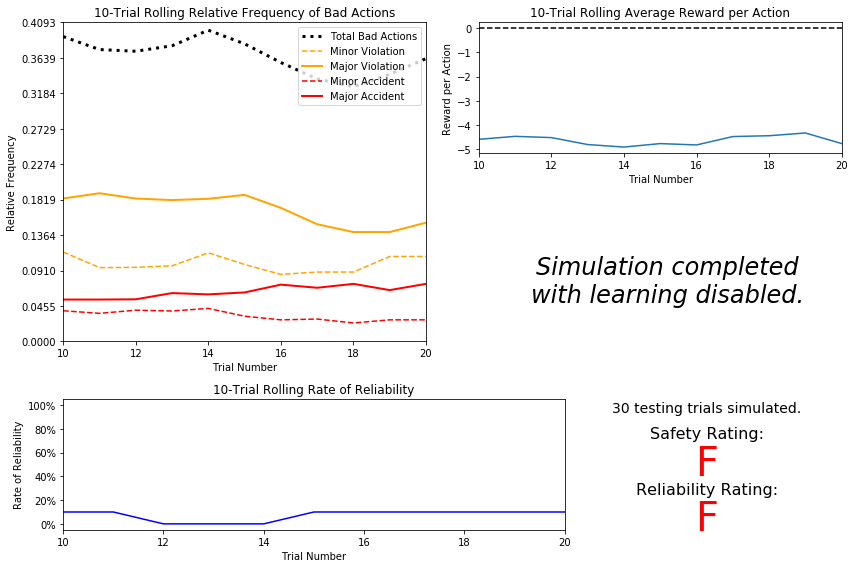

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
- 从第一张图可以知道，如果随机选取动作（停，前行，左转，右转），那么约有35%-50%的概率，动作是错误的。会照成事故（小、大型事故）的动作占了10%左右；
- 这样的出错率是完全不可容忍的，正常情况下，从数量级的角度上讲，也许需要万次以上的动作才能有一个小事故，数十万次动作，才有可能容忍一个较大的操作失误；
- 从图中所看到的奖励，可以发现，每次实验，平均-4到-6分，都为负数，这个暂时可以认为是正常的，其一：方向是随机选择的，很难到达目的地；其二：行动是随机的，太容易引起交通事故了；
- 同时，驾驶代理程序的可靠性也很差（reliability），基本上只有偶尔一两次（10%-20%）能到达目的地，这就表明模拟程序，在动作随机的情况下，也很难到达目的地；
- 而且，在动作随机的情况下，驾驶代理程序的各项表现均为随机，没能根据实验次数的增加表现更好。
- 很明显，这个代理程序还是太危险，不能上路测试。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
- inputs的数据和安全性的相关性最高，也就是，如果没有这个参数（交通灯，周边行驶车辆），那么汽车驾驶的安全性可以说无从谈起了；
- waypoint和效率相关性最高，如果我们知道我们要往哪个方向走，才不会南辕北辙；
- 如果我一定要放弃某个特征的话，我可能会有限放弃deadline：
    - 1、因为放弃这个参数，只要知道终点的方位（waypoint）还是可以到达终点的，只不过晚到罢了，但若没有方位（waypoint），那就很难到达目的地了；
    - 2、假如deadline的取值范围是1-20（包含1和20），那么单单deadline就有20种取值，如果添加这个特征，状态空间将会增加20倍，将会变得很大；
    - 3、驾驶程序中，因为没有获取到当前智能驾驶汽车与目的地的距离（或者说当前汽车的坐标，目的地坐标，而且这个参数恰好是随机的），我们单纯获取到一个deadline，对于智能汽车的驾驶行为决策并无太大意义。也就是该参数的泛化能力较差。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**
- 如果我选择了如下所有的特征：waypoint, inputs.light, inputs.left, inputs.right, inputs.oncoming，那么状态空间将为：n_state = 3\*2\*64 =384 种状态
    - waypoint有：None，forward，left，right，4个状态，但因为None状态指到达目的地了，因此取其中3个状态：forward，left，right；
    - inputs.light有：red，green，2个状态
    - inputs.left, inputs.right, inputs.oncoming都有：None，left，right，forward，64个组合状态
- 我觉得384种状态并不是很多，因此，在一定数量的训练，获取奖励及惩罚后，驾驶代理程序能学会对应的驾驶模式，将车安全开到终点的。
- 在每种状态下，都有4个可能的动作：None，left，right，forword，那么总共应该有：384\*4=1536种状态-动作组合，下面我们要训练就需要对这些状态-动作组合进行评估（评估奖励及惩罚）
    - 假设每一轮训练会随机经历20个状态（可重复的状态），那么进行500轮实验将会随机经历10000次随机状态，如果这些状态下，我们都是随机挑选动作的（完全探索，对先前训练的结果不加以利用），就会得到10000次随机的状态-动作组合；
    - 我们把1536种状态-动作组合当作是样品，我们随机抽样（每次都放回）10000次，那么至始至终都没有被抽取到的样品数量（期望值）约为：2.28
    - 如果我们降低实验次数，使得程序只能经历：5000次随机的状态-动作组合，也就是在1536个样品中可放回随机抽样5000次：那么将有59.19个样品没有被选取到。
    - 计算公式如下：

In [14]:
#计算 s 个样品，随机可重复抽样 t 次，每个样品没有被抽中的概率以及s个样品中，没被抽中的样品数量的期望值
from decimal import *
s = Decimal(1536)
t = 5000

X = (s-1)**t
Y = s**t

#单个样品没有被抽中的概率为：
P = (X/Y)
print('The probability of each sample not to be get:',P)

#没被抽中的样品数量的期望值
num = P*s
print ('The expectation of samples not to be get:',num)

('The probability of each sample not to be get:', Decimal('0.03853191455488459659335335434'))
('The expectation of samples not to be get:', Decimal('59.18502075630274036739075227'))


### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

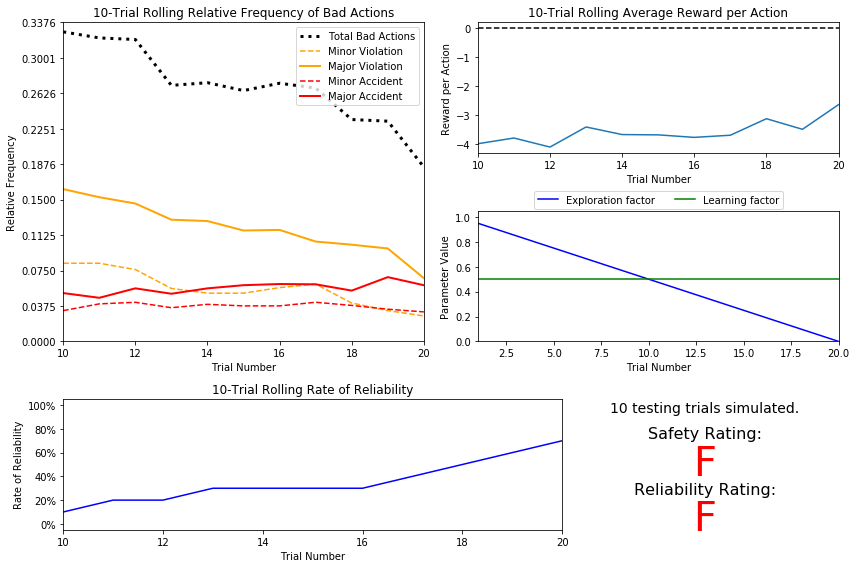

In [15]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**
- 从实验结果图中可以发现，从过程上来说：
    - 1、从左上角的图形（错误行为的相对频率）可以知道，在训练过程中，随着训练的进展，驾驶代理的错误行为在降低；
    - 2、从左下角的图形（可靠性）可以看出，随着训练的进展，驾驶代理的可靠性在增加，达到目的地的概率在增加；
    - 3、从右上角的图形（动作平均奖励）可以看出，动作平均奖励在增加；
- 如上三点证明，学习训练是有效的。
- 但从结果上来说，不论是安全性还是可靠性，都远远不够理想，分析如下：
- 从探索因子的变化可以知道，探索因子下降太快了，只是做了20次训练后，探索因子$\epsilon$就降为0（1-20*0.05=0, 1为原始的探索因子，0.05为探索因子线性下降的梯度，也就是20次训练实验后，探索因子变为0），不再进行训练，而我们设定的状态又有太多种，要在20次训练中就学得驾驶的奖惩制度是很困难的。
- 与初代的驾驶程序相比，安全性和可靠性并没有出现质变，仍然很差，但乐观的一面是，驾驶程序正在改善，并且，改善的速度还算乐观。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

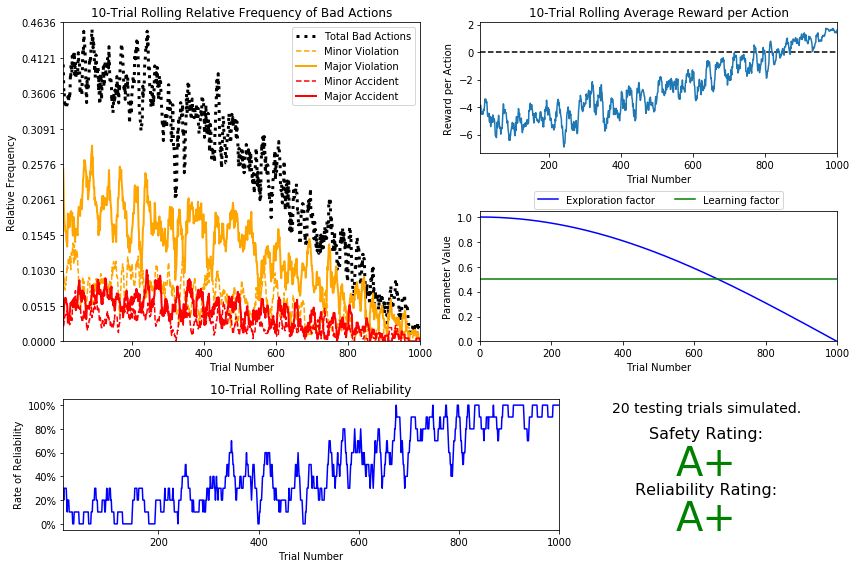

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**
- 使用了三角函数cos，作为epsilon(探索因子)的衰减函数,我之所以选择三角函数替代线性函数，是因为我希望训练程序在开始阶段，更多的进行探索，而不是利用；
- 在测试之前，驾驶代理进行了1000次训练实验；
- 我使用的tolerance=0.001,其实，当epsilon<0.05时，基本上驾驶程序已经进入了利用模式（95%以上利用），只有低于5%的概率进行探索，这时差不多可以结束训练进行测试了，但我仍希望看到驾驶程序在进行测试前，其表现如何，因此，我将rolerance的值设置得较低；
- 我使用的学习率alpha=0.6，在迭代过程中学习速率alpha越大，保留之前训练的效果就越少，在训练过程中，当alpha=0.5，驾驶程序的表现比较稳定，因此我选择0.5；
- 与之前的默认Q-Learning学习器相比，这个Q-Learning学习器主要的改进为epsilon(探索因子)、以及训练次数；
- 从训练结果可知，该学习器最终能获得的安全性评级为A+，可靠性评级也为A+，这就代表该车是可靠的，它学习了一个合适的策略；
- 我对智能车的可靠性和安全性评分满意。 
<br/></br>
<br/></br>
- 另外：
*探索因子的函数及作图如下，可以发现，三角函数cos曲线是上突的。*

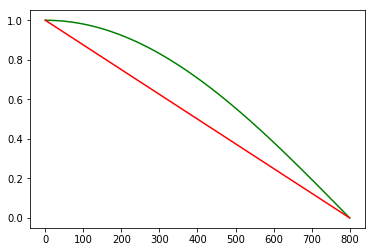

In [17]:
# 我使用的epsilon函数 为 epsilon = cos(t * c) 
# 其中t为训练次数，c为常数，训练总次数设定为training_time=800
# c = 0.5 * math.pi/training_time 当 t = training_time时，epsilon = 0

import numpy as np
from pylab import *

training_time = 800
c = 0.5 * math.pi/training_time
t = np.linspace(0, training_time, training_time,endpoint=True)
epsilon = np.cos(t * c)

linear_epsilon = 1 - t/training_time

plot(t, epsilon, 'g')
plot(t,linear_epsilon, 'r')

#plot(x1, y1, ’r’)# use pylab to plot x and y
#plot(x2, y2, ’g’)

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 
- 如我们把控的安全性和可靠性，最优策略应该是那种既能保证车辆安全，同时尽快到达目的地的策略，这样才能做到安全，可靠。
- 在这个基础上，现有规定也是在引导交通安全有序进行的。这种情况下，有些状态的行动就存在最优策略，既能保证汽车安全驾驶，又能极大降低事故的发生概率；
- 因此推理应该有如下最佳策略：
    - 1、当前面为红灯时，使用None动作为最佳策略，其次才会考虑路况与目的地，如果路况允许而且目的地在右方，允许右转；
    - 2、遇到绿灯路口，最佳策略是往目的地方向走，兼顾考虑当前路况。
- 查看日志，与如上推断相比：
    - 对于策略1，有记录：('right', 'red', None, 'left', 'left')-- None : 1.76;  forward : -9.82;  right : 1.53;  left : -10.25。即目的地在右方，路口红灯，但当前最佳策略是等待，其次是右转，这是正确的；
    - 对于策略2，有记录：('forward', 'green', None, None, 'left')-- None : 0.40;  forward : 1.55;  right : 0.89;  left : 0.62。即目的地在前方，路口绿灯，最佳策略是前行，这符合我们日常开车习惯；
- 但记录里面也会有策略不同于最佳策略的，如记录：('left', 'red', 'right', 'left', 'right');  None : 0.00;  forward : 0.00;  right : 0.48;  left : -30.41。目的地在左方，路口红灯，且周边有车辆通行，当前最佳策略是等待，但等待（None）的得分是0.0，而右转的得分是0.48大于0.0，猜测，是因为驾驶程序在（随机）探索的时候，恰好没有选择到等待（None）这种动作，导致右转的动作成了最佳策略。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**
- 未来奖励`gamma*maxQ`是指，我们在计算当前状态-动作r(si,ai)获得的奖励时，将该动作(ai)后的下一状态的最优动作效用也算入该动作奖励中（比例为gama），变为奖励：`R=r(si,ai)+gmma*maxQ`;
- 在当前情形下，并不适用，原因有：
- 1、关于出租车本身，如果每次驾驶的目的地不一样，那么未来状态回溯到当前状态进行奖励是无用的，假如之前的驾驶经历（未来状态奖励其实是之前训练过程留下的“脚印”）是，下一个点就在终点边上，获得了较大的奖励，但是，我们这次的终点并不一样，我们这次选择动作并到达下一状态，其实不能获取到原先期待的奖励`gamma*maxQ`；
- 2、当前智能车的状态里面并没有记录每次训练的智能车的起、始地址，同时还没有记录当前智能车的位置坐标（未来状态也没有记录这些），所以导致下一状态和当前状态很难对应起来；
- 3、当前的智能车不能知道下一个状态是什么状态：会不会遇到红灯，有没有其他车辆阻碍车道。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。